In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#### DATA PREPROCESSING

In [5]:
# To read the downloaded preprocessed dataset (.txt file)
df = pd.read_csv("diabetes_scale.txt", delimiter = '\t')

df.head()

,-1 1:-0.294118 2:0.487437 3:0.180328 4:-0.292929 5:-1 6:0.00149028 7:-0.53117 8:-0.0333333
0,+1 1:-0.882353 2:-0.145729 3:0.0819672 4:-0.41...
1,-1 1:-0.0588235 2:0.839196 3:0.0491803 4:-1 5:...
2,+1 1:-0.882353 2:-0.105528 3:0.0819672 4:-0.53...
3,-1 1:-1 2:0.376884 3:-0.344262 4:-0.292929 5:-...
4,+1 1:-0.411765 2:0.165829 3:0.213115 4:-1 5:-1...


Converting the dataset to a better format.

In [6]:
# Define the input and output file paths
input_file = 'diabetes_scale.txt'
output_file = 'diabetes_scale.csv'

# Open the txt file and read its contents
with open(input_file, 'r') as txt_file:
    lines = txt_file.readlines()

# Open the csv file to write the data
with open(output_file, 'w') as csv_file:
    for line in lines:
        # Replace 'index:' pattern (e.g., 1: or 2:) with an empty string
        # Split the line into parts and write them to the csv
        cleaned_line = [part.split(":")[-1] for part in line.strip().split()]
        csv_file.write(','.join(cleaned_line) + '\n')


In [7]:
# Reading the dataset converted to csv format
df = pd.read_csv("diabetes_scale.csv", header = None)

df.head()

,0,1,2,3,4,5,6,7,8
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


The above values in the dataset have been normalized between -1 to 1. This ensures that all the features are in the same value range.

Adding column names to the dataset for better analysis

In [8]:
# Loading column names from the original dataset
df_org = pd.read_csv("diabetes.csv")

#Extracting the column names
column_names = list(df_org.columns)

# Re arranging the columns since the preprocessed dataset has outcome as the fist column
column_names = [column_names[-1]] + column_names[:-1]

print(column_names, type(column_names))

['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] <class 'list'>


In [9]:
# Assigning the columns names to the preprocessed dataset
df.columns = column_names

df.head(10)

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
5,1,-0.411765,0.165829,0.213115,-1.000000,-1.000000,-0.236960,-0.894962,-0.700000
6,-1,-0.647059,-0.216080,-0.180328,-0.353535,-0.791962,-0.076006,-0.854825,-0.833333
7,1,0.176471,0.155779,-1.000000,-1.000000,-1.000000,0.052161,-0.952178,-0.733333
8,-1,-0.764706,0.979899,0.147541,-0.090909,0.283688,-0.090909,-0.931682,0.066667
9,-1,-0.058824,0.256281,0.573770,-1.000000,-1.000000,-1.000000,-0.868488,0.100000


In [10]:
print(df.describe())

          Outcome  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean     0.302083    -0.547641    0.215020       0.131574      -0.585122   
std      0.953903     0.396421    0.321333       0.319896       0.322267   
min     -1.000000    -1.000000   -1.000000      -1.000000      -1.000000   
25%     -1.000000    -0.882353   -0.005025       0.016393      -1.000000   
50%      1.000000    -0.647059    0.175879       0.180328      -0.535354   
75%      1.000000    -0.294118    0.409547       0.311475      -0.353535   
max      1.000000     1.000000    1.000000       1.000000       1.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  759.000000  
mean    -0.810410   -0.047279                 -0.662247   -0.599166  
std      0.273036    0.237041                  0.284229    0.388652  
min     -1.000000   -1.000000      

Description Analysis

Count: The count is consistent for most columns, except for Age, which has a few missing values.

Minimum and Maximum Values (min, max): These values indicate the range of the scaled data. The minimum of -1 and maximum of 1 for all features suggest that the data is likely standardized or normalized between these bounds.


In [11]:
# Check for missing values
print(df.isnull().sum())


Outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         9
dtype: int64


Here, 'Age' column has 9 missing values. Since this count is very low, we can replace these values with mean value, instead of dropping the entire column.

In [12]:
# Get the median value
median_age = df['Age'].median()

# Replacing all the NaN values with median value
df['Age'] = df['Age'].fillna(median_age)

print(df.isna().sum())

Outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


#### DATA ANALYSIS



Using Original Dataset for Analysis

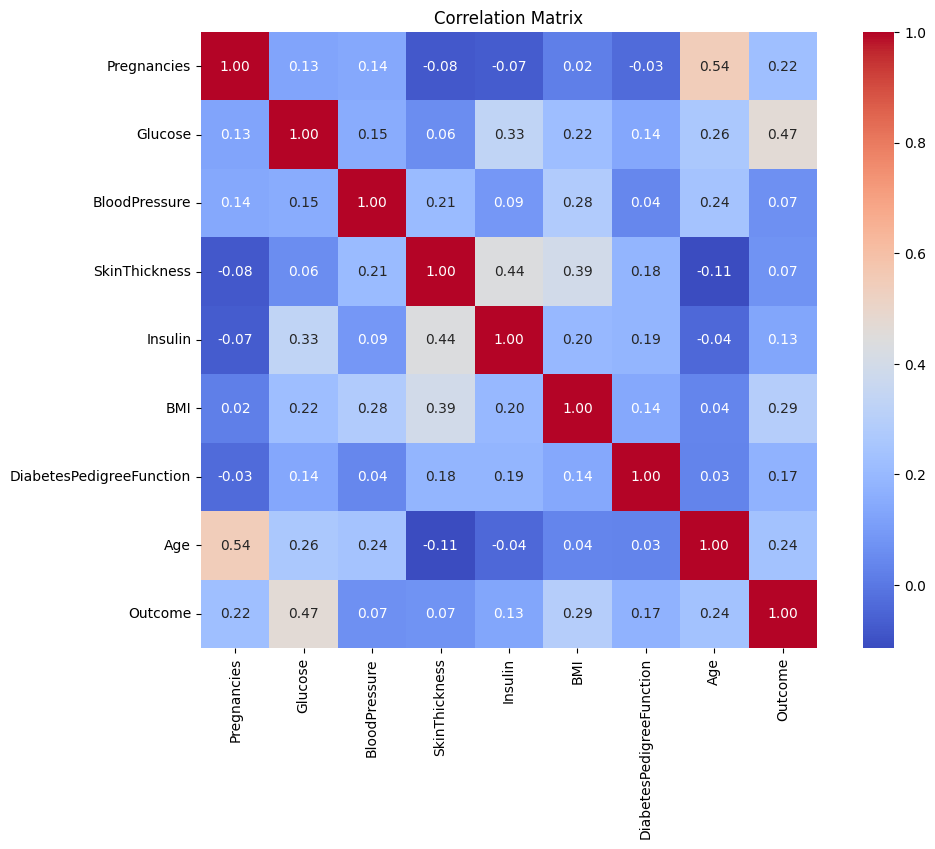

In [13]:
# Calculate the correlation matrix
correlation_matrix = df_org.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

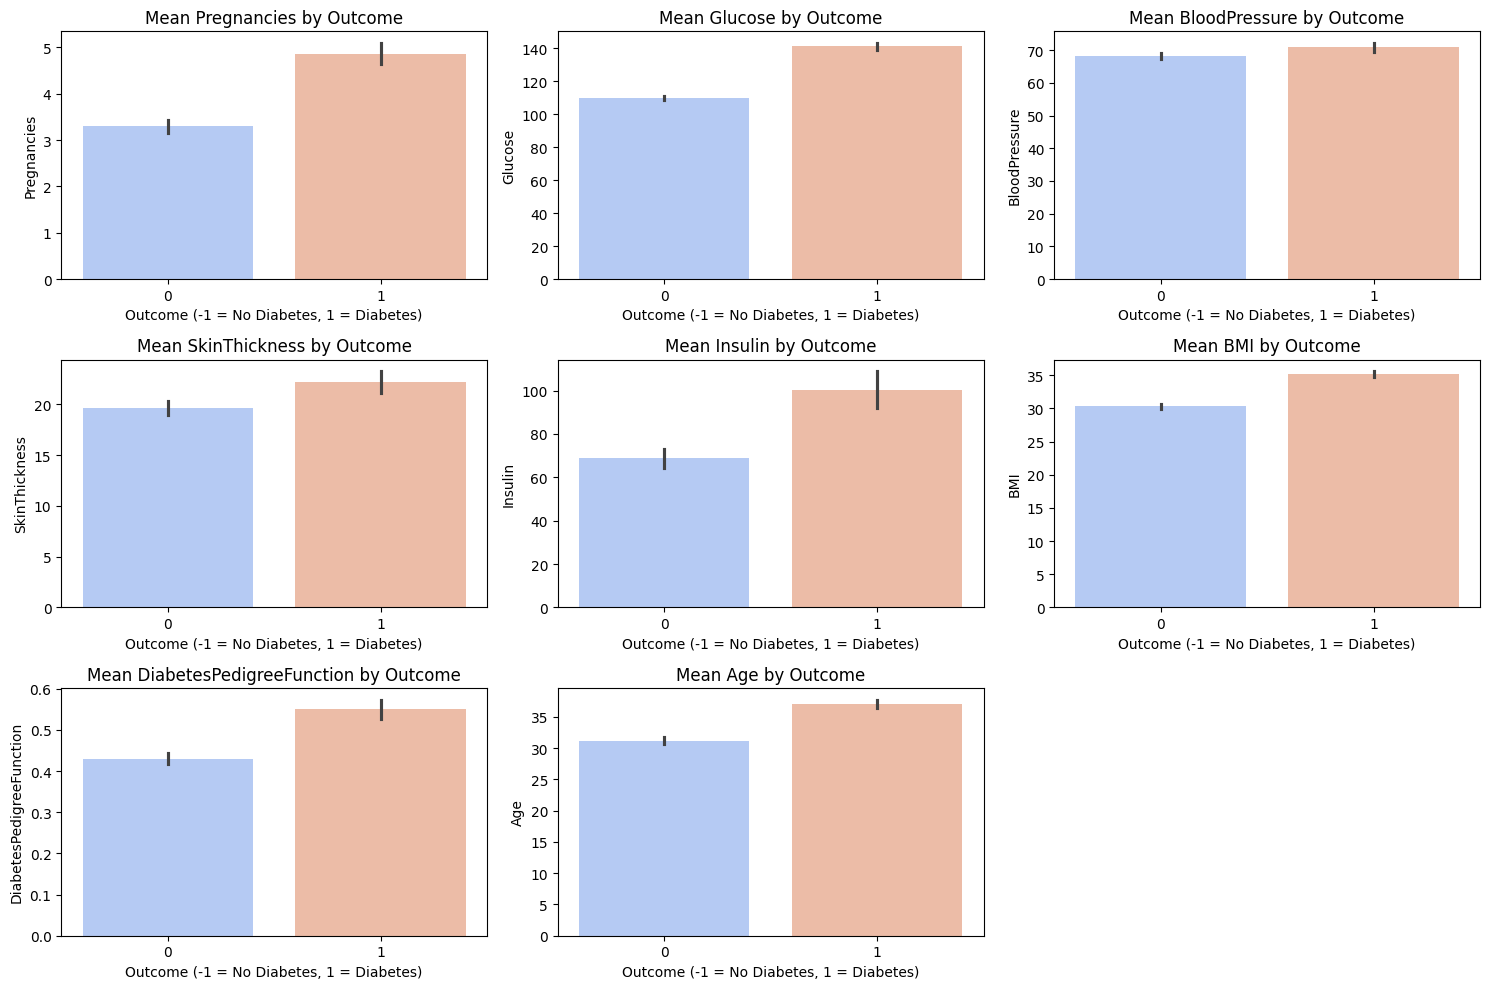

In [14]:
# List of features to plot against Outcome
features = df_org.columns[:-1]  # Exclude 'Outcome' for plotting

# Set up the plot
plt.figure(figsize=(15, 10))

# Create bar plots for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Adjust according to the number of features
    sns.barplot(x='Outcome', y=feature, data=df_org, hue='Outcome', palette='coolwarm', estimator='mean', errorbar='se', legend=False)
    plt.title(f'Mean {feature} by Outcome')
    plt.xlabel('Outcome (-1 = No Diabetes, 1 = Diabetes)')
    plt.ylabel(feature)

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()


Analysis of Diabetes Features by Outcome

1. **Mean Pregnancies**:
   - Individuals with diabetes (Outcome = 1) have a higher average number of pregnancies compared to those without diabetes (Outcome = -1).

2. **Mean Glucose**:
   - Higher glucose levels in the blood increase the possibility of diabetes.

3. **Mean Blood Pressure**:
   - The mean blood pressure is relatively similar across both groups, indicating that it may not be a strong predictor of diabetes alone.

4. **Mean Skin Thickness**:
   - People with higher than average skin thickness may be more likely to have diabetes than those without.

5. **Mean Insulin**:
   - Insulin levels are higher in individuals with diabetes.

6. **Mean BMI**:
   - Individuals with diabetes have a higher mean BMI compared to non-diabetic individuals.

7. **Mean Diabetes Pedigree Function**:
   - There’s a slight increase in the mean Diabetes Pedigree Function score for individuals with diabetes.

8. **Mean Age**:
   - Age is a well-established risk factor for diabetes, suggesting that older individuals have a higher risk for diabetes.


#### MODEL IMPLEMENTATION


In [15]:
# Splitting the dataset
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train test split is generally 0.7, 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


In [16]:
# print(len(X_train), len(X_test), len(y_train),len(y_test))
print(X_train.head())

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
113    -0.529412 -0.236181       0.016393      -1.000000 -1.000000  0.013413   
395    -0.764706  0.276382      -0.049180      -0.515152 -0.349882 -0.174367   
453    -0.764706  0.195980      -1.000000      -1.000000 -1.000000 -0.415797   
401    -0.294118  0.376884      -1.000000      -1.000000 -0.278688 -0.937660   
245     0.058824  0.849246       0.393443      -0.696970 -1.000000 -0.105812   

     DiabetesPedigreeFunction       Age  
113                 -0.732707 -0.866667  
395                  0.299744 -0.866667  
453                 -0.356106  0.700000  
401                  0.133333 -0.733333  
245                 -0.030743 -0.066667  


In [17]:
# Helper functions
def initialize_weights(num_features):
    return np.zeros(num_features + 1)  # +1 for the bias term

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def predict(activation_func, weights, x):
    # Calculate the activation using the specified activation function
    z = np.dot(weights, x)

    if activation_func == "sigmoid":
        activation = sigmoid(z)
        # Threshold set to 0.5
        return 1 if activation >= 0.5 else -1  # Assuming output is -1 or 1

    elif activation_func == "relu":
        activation = relu(z)
        # Return class based on ReLU activation
        return 1 if activation > 0 else -1  # Assuming output is -1 or 1

    else:
        raise ValueError(f"Unknown activation function: {activation_func}")

def perceptronModel(activation_function, X_train, y_train, learning_rate=0.01, num_epochs=100):
    num_features = X_train.shape[1]
    weights = initialize_weights(num_features)

    for j in range(num_epochs):
        for i in range(len(X_train)):
            x = np.insert(X_train[i], 0, 1)  # Adding bias term
            y_pred = predict(activation_function, weights, x)
            error = y_train[i] - y_pred

            # Updating weights
            weights[1:] += learning_rate * error * x[1:]
            weights[0] += learning_rate * error  # Updating bias

    return weights


In [18]:
activation_function = "sigmoid"
learning_rate = 0.01
epochs = 100

print("Training Perceptron Model 1 on Diabetes dataset")
print("Activation Function used:", activation_function)
print("Learning Rate used:", learning_rate)
print("Number of Epochs:", epochs)

perceptron_weights_model1 = perceptronModel(activation_function, X_train.values, y_train.values, learning_rate = learning_rate, num_epochs=epochs)


print("\nTesting trained Perceptron Model 1 on test data")
y_pred_model1 = [predict(activation_function,perceptron_weights_model1, np.insert(x, 0, 1)) for x in X_test.values]



Training Perceptron Model 1 on Diabetes dataset
Activation Function used: sigmoid
Learning Rate used: 0.01
Number of Epochs: 100

Testing trained Perceptron Model 1 on test data


Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.48      0.57        84
        True       0.75      0.89      0.81       147

    accuracy                           0.74       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.74      0.74      0.73       231



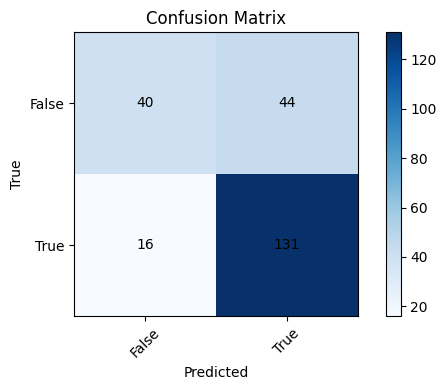

In [19]:
accuracy = accuracy_score(y_test, y_pred_model1)
report = classification_report(y_test, y_pred_model1)
conf_matrix = confusion_matrix(y_test, y_pred_model1)
class_labels = ["False","True"]
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.tight_layout()

# Display classification report
class_report = classification_report(y_test, y_pred_model1, target_names=class_labels)
print('Classification Report:\n', class_report)

plt.show()

In [20]:
activation_function = "relu"
learning_rate = 0.01
epochs = 100

print("Training Perceptron Model 2 on Diabetes dataset")
print("Activation Function used:", activation_function)
print("Learning Rate used:", learning_rate)
print("Number of Epochs:", epochs)

perceptron_weights_model2 = perceptronModel(activation_function, X_train.values, y_train.values, learning_rate = learning_rate, num_epochs=epochs)


print("\nTesting trained Perceptron Model 2 on test data")
y_pred_model2 = [predict(activation_function,perceptron_weights_model2, np.insert(x, 0, 1)) for x in X_test.values]

Training Perceptron Model 2 on Diabetes dataset
Activation Function used: relu
Learning Rate used: 0.01
Number of Epochs: 100

Testing trained Perceptron Model 2 on test data


Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.33      0.47        84
        True       0.71      0.95      0.82       147

    accuracy                           0.73       231
   macro avg       0.76      0.64      0.64       231
weighted avg       0.75      0.73      0.69       231



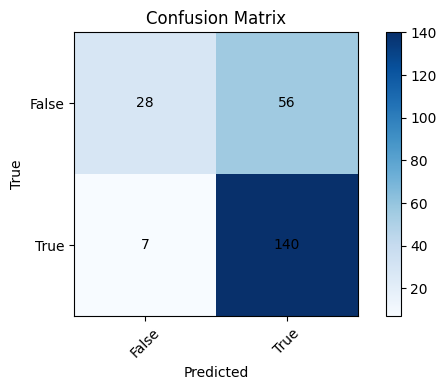

In [21]:
accuracy = accuracy_score(y_test, y_pred_model2)
report = classification_report(y_test, y_pred_model2)
conf_matrix = confusion_matrix(y_test, y_pred_model2)
class_labels = ["False","True"]
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.tight_layout()

# Display classification report
class_report = classification_report(y_test, y_pred_model2, target_names=class_labels)
print('Classification Report:\n', class_report)

plt.show()

Based on the F1 Score and Accuracy,

Activation Function Sigmoid is performing better than ReLu activation function.

Experimenting on Learning Rate to find the optimal learning rate for the Sigmoid Activation Function.


In [22]:
# Keeping Activation Function and Number of Epochs as constant
activation_function = "sigmoid"
epochs = 100
learning_rate_lst = [0.0001, 0.001, 0.01, 1,10]

accuracy_lst = []

for learning_rate in learning_rate_lst:
    print("Training Perceptron Model 2 on Diabetes dataset")
    print("Activation Function used:", activation_function)
    print("Learning Rate used:", learning_rate)
    print("Number of Epochs:", epochs)

    perceptron_weights_model = perceptronModel(activation_function, X_train.values, y_train.values, learning_rate = learning_rate, num_epochs=epochs)

    y_pred = [predict(activation_function,perceptron_weights_model, np.insert(x, 0, 1)) for x in X_test.values]

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_lst.append(accuracy)
    print("Accuracy: ", accuracy,"\n")




Training Perceptron Model 2 on Diabetes dataset
Activation Function used: sigmoid
Learning Rate used: 0.0001
Number of Epochs: 100
Accuracy:  0.7402597402597403 

Training Perceptron Model 2 on Diabetes dataset
Activation Function used: sigmoid
Learning Rate used: 0.001
Number of Epochs: 100
Accuracy:  0.7402597402597403 

Training Perceptron Model 2 on Diabetes dataset
Activation Function used: sigmoid
Learning Rate used: 0.01
Number of Epochs: 100
Accuracy:  0.7402597402597403 

Training Perceptron Model 2 on Diabetes dataset
Activation Function used: sigmoid
Learning Rate used: 1
Number of Epochs: 100
Accuracy:  0.7402597402597403 

Training Perceptron Model 2 on Diabetes dataset
Activation Function used: sigmoid
Learning Rate used: 10
Number of Epochs: 100
Accuracy:  0.7402597402597403 



In [23]:
# Keeping  Number of Epochs as constant
epochs = 100
learning_rate_lst = [0.0001, 0.001, 0.01, 1,10]

accuracy_lst1 = []
accuracy_lst2 = []

for learning_rate in learning_rate_lst:

    print("\n\nTraining Perceptron Model on Diabetes dataset")
    print("Activation Function used: Sigmoid")
    print("Learning Rate used:", learning_rate)
    print("Number of Epochs:", epochs)
    perceptron_weights_model1 = perceptronModel("sigmoid", X_train.values, y_train.values, learning_rate = learning_rate, num_epochs=epochs)
    y_pred1 = [predict(activation_function,perceptron_weights_model1, np.insert(x, 0, 1)) for x in X_test.values]

    print("\nTraining Perceptron Model on Diabetes dataset")
    print("Activation Function used: ReLu")
    print("Learning Rate used:", learning_rate)
    print("Number of Epochs:", epochs)
    perceptron_weights_model2 = perceptronModel('relu', X_train.values, y_train.values, learning_rate = learning_rate, num_epochs=epochs)
    y_pred2 = [predict(activation_function,perceptron_weights_model2, np.insert(x, 0, 1)) for x in X_test.values]


    accuracy1 = accuracy_score(y_test, y_pred1)
    accuracy_lst1.append(accuracy1)

    accuracy2 = accuracy_score(y_test, y_pred2)
    accuracy_lst2.append(accuracy2)
    # print("Accuracy: ", accuracy,"\n")






Training Perceptron Model on Diabetes dataset
Activation Function used: Sigmoid
Learning Rate used: 0.0001
Number of Epochs: 100

Training Perceptron Model on Diabetes dataset
Activation Function used: ReLu
Learning Rate used: 0.0001
Number of Epochs: 100


Training Perceptron Model on Diabetes dataset
Activation Function used: Sigmoid
Learning Rate used: 0.001
Number of Epochs: 100

Training Perceptron Model on Diabetes dataset
Activation Function used: ReLu
Learning Rate used: 0.001
Number of Epochs: 100


Training Perceptron Model on Diabetes dataset
Activation Function used: Sigmoid
Learning Rate used: 0.01
Number of Epochs: 100

Training Perceptron Model on Diabetes dataset
Activation Function used: ReLu
Learning Rate used: 0.01
Number of Epochs: 100


Training Perceptron Model on Diabetes dataset
Activation Function used: Sigmoid
Learning Rate used: 1
Number of Epochs: 100

Training Perceptron Model on Diabetes dataset
Activation Function used: ReLu
Learning Rate used: 1
Number

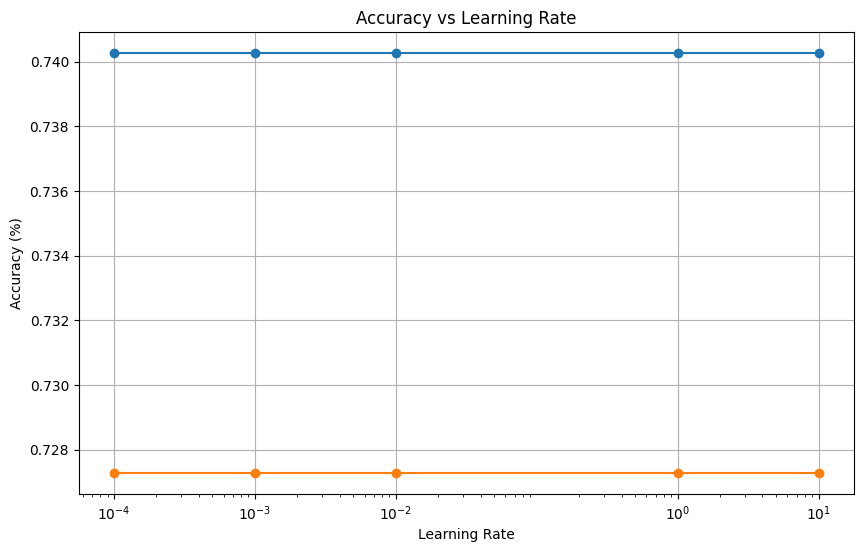

In [24]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_lst, accuracy_lst1, marker='o', linestyle='-')
plt.plot(learning_rate_lst, accuracy_lst2, marker='o', linestyle='-')

# Adding titles and labels
plt.title('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (%)')
plt.xscale('log')  # Optional: Use logarithmic scale for learning rates
plt.xticks(learning_rate_lst)  # Set x-ticks to the actual learning rates


# Adding grid for better readability
plt.grid()

# Show the plot
plt.show()


Here, the change in learning rate is not majorly affecting the accuracy of the model. Hence, using Learning Rate = 0.01.
The sigmoid activation function is performing better than the relu activation function.


In [25]:
# Keeping Activation Function and Learning Rate as constant
activation_function = "sigmoid"
epochs_lst = [25, 50, 100, 200, 500, 1000, 2000, 4000]
learning_rate = 0.01

accuracy_lst = []

for epochs in epochs_lst:
    print("Training Perceptron Model 2 on Diabetes dataset")
    print("Activation Function used:", activation_function)
    print("Learning Rate used:", learning_rate)
    print("Number of Epochs:", epochs)

    perceptron_weights_model = perceptronModel(activation_function, X_train.values, y_train.values, learning_rate = learning_rate, num_epochs=epochs)

    y_pred = [predict(activation_function,perceptron_weights_model, np.insert(x, 0, 1)) for x in X_test.values]

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_lst.append(accuracy)
    print("Accuracy: ", accuracy,"\n")




Training Perceptron Model 2 on Diabetes dataset
Activation Function used: sigmoid
Learning Rate used: 0.01
Number of Epochs: 25
Accuracy:  0.7402597402597403 

Training Perceptron Model 2 on Diabetes dataset
Activation Function used: sigmoid
Learning Rate used: 0.01
Number of Epochs: 50
Accuracy:  0.7012987012987013 

Training Perceptron Model 2 on Diabetes dataset
Activation Function used: sigmoid
Learning Rate used: 0.01
Number of Epochs: 100
Accuracy:  0.7402597402597403 

Training Perceptron Model 2 on Diabetes dataset
Activation Function used: sigmoid
Learning Rate used: 0.01
Number of Epochs: 200
Accuracy:  0.7186147186147186 

Training Perceptron Model 2 on Diabetes dataset
Activation Function used: sigmoid
Learning Rate used: 0.01
Number of Epochs: 500
Accuracy:  0.7532467532467533 

Training Perceptron Model 2 on Diabetes dataset
Activation Function used: sigmoid
Learning Rate used: 0.01
Number of Epochs: 1000
Accuracy:  0.7489177489177489 

Training Perceptron Model 2 on Diab

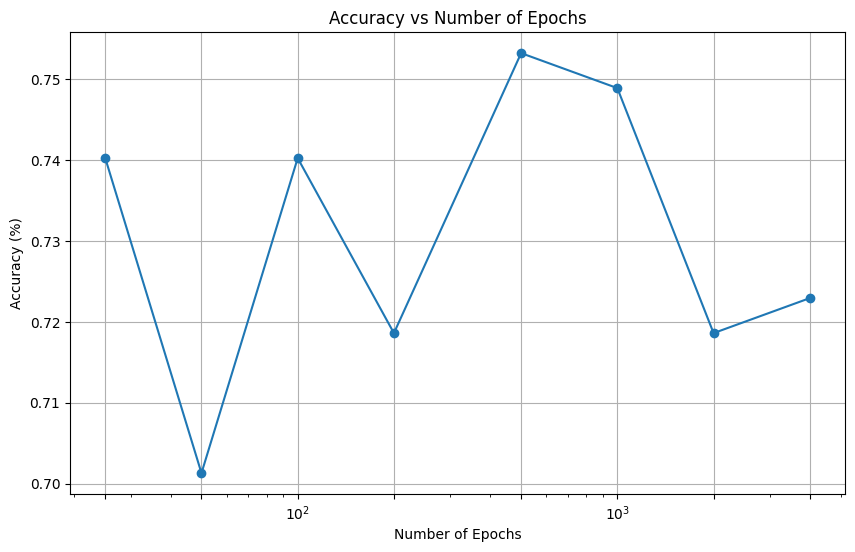

In [26]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(epochs_lst, accuracy_lst, marker='o', linestyle='-')

# Adding titles and labels
plt.title('Accuracy vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy (%)')
plt.xscale('log')  # Optional: Use logarithmic scale for learning rates
plt.xticks(epochs_lst)  # Set x-ticks to the actual learning rates


# Adding grid for better readability
plt.grid()

# Show the plot
plt.show()


#### SUMMARY

Based on the experiments,
1. Sigmoid activation function performs better than ReLu.
2. Accuracy vs Learning Rate is a constant line, indicating that the model is not complex enough to capture the underlying patterns in the data. A multilayer perceptron might show a different result.
3. 500 Number of epochs is the optimum for the given learning rate and activation function.
